## Step 1: Import Necessary Libraries

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from scipy.optimize import minimize
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

## Step 2: Load the Dataset

In [137]:
df = pd.read_csv("/Users/sandeepsrinivasdwaram/Desktop/BakedFoodNutritions.csv")
df.head()

,Food,ProductType,FlavorVariant,Calories-kcl,Protein-g,Carb-g,Fiber-g,Sugar-g,Sodium-g,SaturatedFat-g,MonounsaturatedFat-g,PolyunsaturatedFat-g,TransaFat-g,MeasureQuantity,MeasureType,MQCalories-kcl,MQGmWt,MQCalories100gm-kcl
0,Andrea'S,Gluten Free Soft Dinner Roll,Prepared From Recipe,257,5.7,40.2,2.9,3.0,544,4.84,4.51,4.37,0.49,1.0,Roll,177,69.0,257
1,Archway,Home Style Cookies,Chocolate Chip Ice Box,497,4.3,65.0,2.0,34.1,270,8.10,8.90,1.40,5.83,1.0,Serving,119,24.0,497
2,Archway,Home Style Cookies,Coconut Macaroon,460,3.0,61.2,5.1,45.2,200,20.10,1.60,0.80,0.49,1.0,Serving,101,22.0,460
3,Archway,Home Style Cookies,Date Filled Oatmeal,400,4.7,68.2,2.1,34.3,331,2.80,4.80,1.10,3.36,1.0,Serving,100,25.0,400
4,Archway,Home Style Cookies,Dutch Cocoa,431,4.5,69.4,2.6,35.4,384,3.60,5.90,1.20,4.24,1.0,Serving,103,24.0,431


## Step 3: Basic Data Information

In [138]:
df.info()  # Check column names, types, and missing values
df.describe()  # Summary statistics of numerical columns
df.isnull().sum()  # Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Food                  656 non-null    object 
 1   ProductType           656 non-null    object 
 2   FlavorVariant         656 non-null    object 
 3   Calories-kcl          656 non-null    int64  
 4   Protein-g             656 non-null    float64
 5   Carb-g                656 non-null    float64
 6   Fiber-g               656 non-null    float64
 7   Sugar-g               656 non-null    float64
 8   Sodium-g              656 non-null    int64  
 9   SaturatedFat-g        656 non-null    float64
 10  MonounsaturatedFat-g  656 non-null    float64
 11  PolyunsaturatedFat-g  656 non-null    float64
 12  TransaFat-g           656 non-null    float64
 13  MeasureQuantity       656 non-null    float64
 14  MeasureType           656 non-null    object 
 15  MQCalories-kcl        6

Food                    0
ProductType             0
FlavorVariant           0
Calories-kcl            0
Protein-g               0
Carb-g                  0
Fiber-g                 0
Sugar-g                 0
Sodium-g                0
SaturatedFat-g          0
MonounsaturatedFat-g    0
PolyunsaturatedFat-g    0
TransaFat-g             0
MeasureQuantity         0
MeasureType             0
MQCalories-kcl          0
MQGmWt                  0
MQCalories100gm-kcl     0
dtype: int64

## Step 4: Data Cleaning (if needed)

In [139]:
df.duplicated().sum()

np.int64(0)

In [140]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Food                  656 non-null    object 
 1   ProductType           656 non-null    object 
 2   FlavorVariant         656 non-null    object 
 3   Calories-kcl          656 non-null    int64  
 4   Protein-g             656 non-null    float64
 5   Carb-g                656 non-null    float64
 6   Fiber-g               656 non-null    float64
 7   Sugar-g               656 non-null    float64
 8   Sodium-g              656 non-null    int64  
 9   SaturatedFat-g        656 non-null    float64
 10  MonounsaturatedFat-g  656 non-null    float64
 11  PolyunsaturatedFat-g  656 non-null    float64
 12  TransaFat-g           656 non-null    float64
 13  MeasureQuantity       656 non-null    float64
 14  MeasureType           656 non-null    object 
 15  MQCalories-kcl        6

(None,
        Food                   ProductType           FlavorVariant  \
 0  Andrea'S  Gluten Free Soft Dinner Roll    Prepared From Recipe   
 1   Archway            Home Style Cookies  Chocolate Chip Ice Box   
 2   Archway            Home Style Cookies        Coconut Macaroon   
 3   Archway            Home Style Cookies     Date Filled Oatmeal   
 4   Archway            Home Style Cookies             Dutch Cocoa   
 
    Calories-kcl  Protein-g  Carb-g  Fiber-g  Sugar-g  Sodium-g  \
 0           257        5.7    40.2      2.9      3.0       544   
 1           497        4.3    65.0      2.0     34.1       270   
 2           460        3.0    61.2      5.1     45.2       200   
 3           400        4.7    68.2      2.1     34.3       331   
 4           431        4.5    69.4      2.6     35.4       384   
 
    SaturatedFat-g  MonounsaturatedFat-g  PolyunsaturatedFat-g  TransaFat-g  \
 0            4.84                  4.51                  4.37         0.49   
 1       

## Initial Insights from the Dataset

### <span style="color: #FF5733;">Dataset Overview</span>:
  - Contains **656 records** with **18 columns**.
  - Focuses on different baked food types and their nutritional values.

### <span style="color: #33FF57;">Data Quality</span>:
  - **No missing values** (clean dataset).

### <span style="color: #3357FF;">Column Types</span>:
  - **4 categorical columns**:
    - `Food`
    - `ProductType`
    - `FlavorVariant`
    - `MeasureType`
### <span style="color: #FF33A1;">Nutritional Values</span>:
    - Are numerical, enabling.
    - Statistical analysis.
    - Predictive modeling.

This dataset is well-structured and ready for further exploration and analysis.

## Step 5: Descriptive Statistics Summary of Nutritional Values

In [141]:
# Generate summary statistics
summary_stats = df.describe()
# Display summary statistics as a table
display(summary_stats)

,Calories-kcl,Protein-g,Carb-g,Fiber-g,Sugar-g,Sodium-g,SaturatedFat-g,MonounsaturatedFat-g,PolyunsaturatedFat-g,TransaFat-g,MeasureQuantity,MQCalories-kcl,MQGmWt,MQCalories100gm-kcl
count,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000
mean,393.301829,6.284604,59.662805,3.334451,19.031707,501.539634,4.856921,4.518887,4.383430,0.487759,3.085564,126.065549,34.013415,393.301829
std,99.935004,3.106372,13.155921,2.951149,13.659298,554.188205,4.618037,3.244464,3.289406,0.871798,5.120313,51.332358,19.312018,99.935004
min,51.000000,0.000000,20.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120000,2.000000,3.000000,51.000000
25%,295.750000,4.500000,48.500000,1.600000,5.900000,320.000000,1.600000,2.100000,1.700000,0.200000,1.000000,83.000000,28.000000,295.750000
50%,416.000000,5.900000,63.500000,2.600000,19.000000,412.000000,3.600000,4.250000,3.700000,0.360000,1.000000,127.000000,29.000000,416.000000
75%,476.000000,8.000000,70.000000,3.500000,31.200000,580.500000,6.100000,6.000000,6.400000,0.490000,3.000000,154.000000,34.000000,476.000000
max,562.000000,40.400000,87.700000,26.900000,57.400000,10600.000000,24.700000,21.600000,16.600000,9.400000,30.000000,260.000000,182.000000,562.000000


## Insights from Descriptive Statistics

### <span style="color: #FF5733;">Calories</span>:
- **Average**: 393 kcal per serving.
- **Range**: 51 kcal to 700+ kcal.
- **Insight**: Some baked items are significantly lower in calories than others.

### <span style="color: #33FF57;">Protein</span>:
- **Average**: 6.3g per serving.
- **Insight**: Some items have zero protein, indicating highly processed foods.

### <span style="color: #3357FF;">Carbs</span>:
- **Average**: 59.7g per serving.
- **Insight**: Baked goods are generally high in carbohydrates.

### <span style="color: #FF33A1;">Fiber</span>:
- **Average**: 3.3g per serving.
- **Insight**: Relatively low fiber content for many baked goods.

### <span style="color: #A133FF;">Sugar</span>:
- **Range**: 0g to 80g.
- **Insight**: Huge variation—some products are heavily sweetened.

### <span style="color: #33FFF5;">Sodium</span>:
- **Range**: 0 mg to 2300 mg.
- **Insight**: Some items could be dangerously high in sodium.

### <span style="color: #F5FF33;">Fats</span>:
- **Saturated Fat**:
  - **Average**: 4.85g per serving.
  - **Insight**: Some items have 20g+ saturated fat, making them unhealthy.
- **Trans Fat**:
  - **Average**: 0.48g per serving.
  - **Insight**: Some products contain zero trans fat.
    

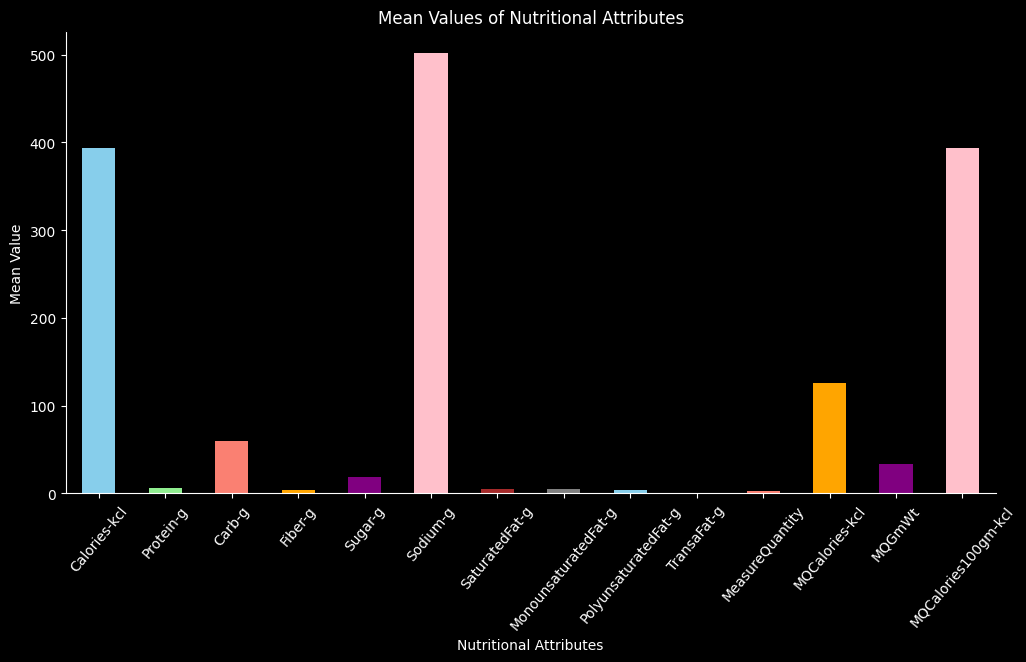

In [142]:
# Plot mean values for visualization
plt.figure(figsize=(12, 6))

# Define a list of colors for each bar
colors = ["skyblue", "lightgreen", "salmon", "orange", "purple", "pink", "brown", "gray"]

# Plot the mean values with different colors for each bar
summary_stats.loc["mean"].plot(kind="bar", color=colors)

# Add title and labels
plt.title("Mean Values of Nutritional Attributes", color="white")  # Set title text color to white
plt.ylabel("Mean Value", color="white")  # Set y-axis label text color to white
plt.xlabel("Nutritional Attributes", color="white")  # Set x-axis label text color to white
plt.xticks(rotation=50, color="white")  # Set x-axis tick labels color to white
plt.yticks(color="white")  # Set y-axis tick labels color to white

# Set background color of the plot and figure
ax = plt.gca()  # Get the current axis
ax.set_facecolor("black")  # Set the plot background color to black
plt.gcf().set_facecolor("black")  # Set the figure background color to black

# Set the color of the spines (axis lines)
ax.spines['bottom'].set_color('white')  # Set x-axis line color to white
ax.spines['left'].set_color('white')  # Set y-axis line color to white
ax.spines['top'].set_color('black')  # Hide top spine
ax.spines['right'].set_color('black')  # Hide right spine

# Show the plot
plt.show()

## Step 6: Distribution Analysis - Histograms & Boxplots for Calories, Fats, Carbs, and Sugar.

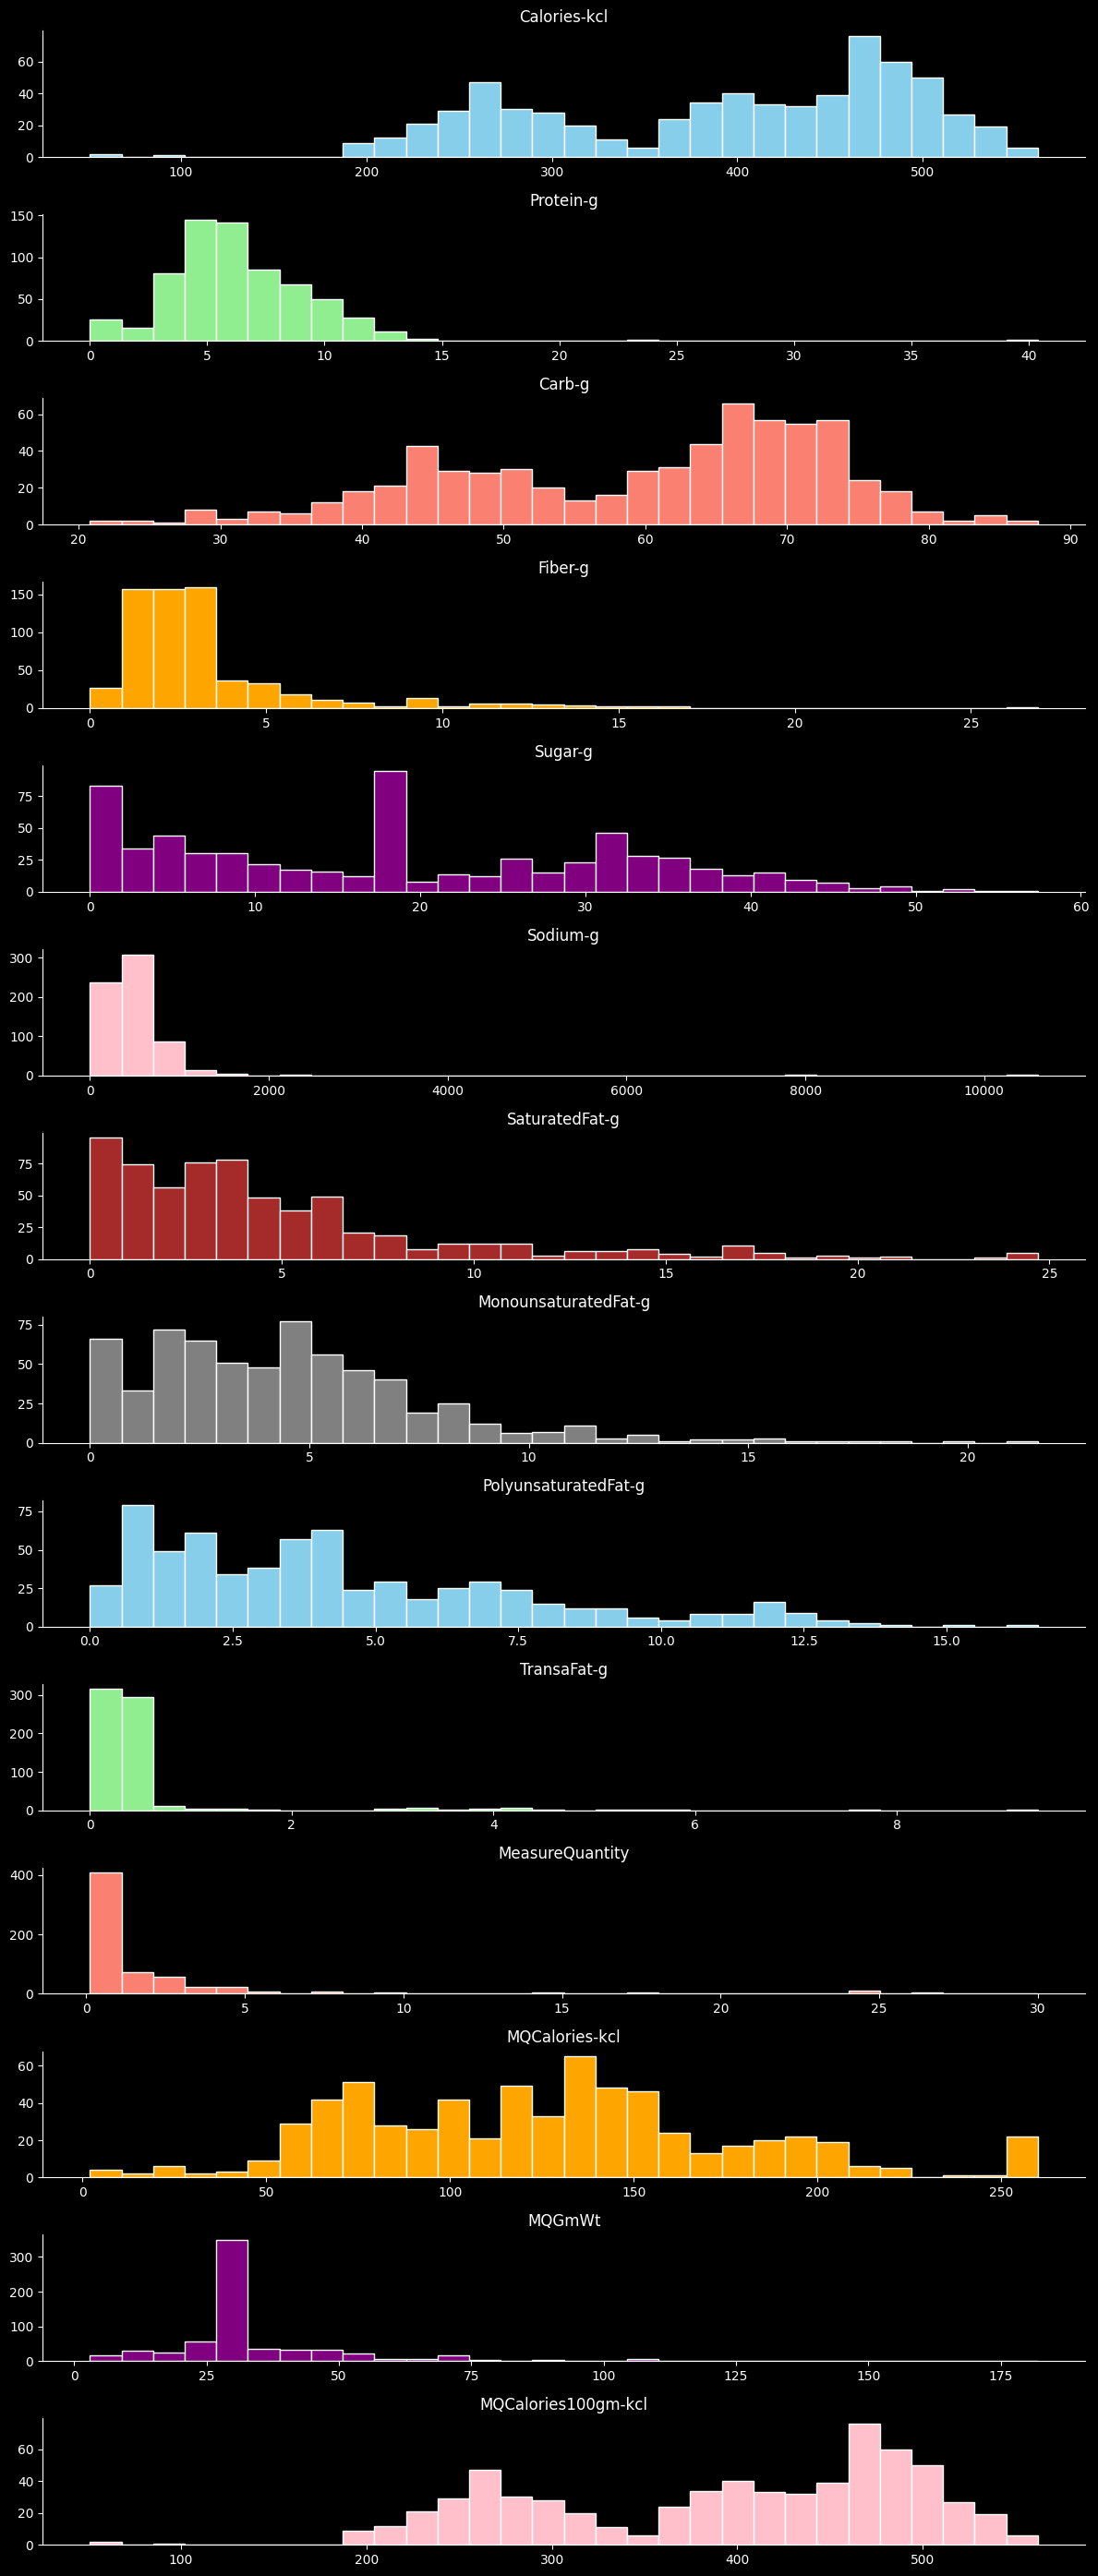

In [143]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns  # Select only numeric columns

# Define a list of colors for each numeric column
colors = ["skyblue", "lightgreen", "salmon", "orange", "purple", "pink", "brown", "gray"]

# Create subplots
fig, axes = plt.subplots(nrows=len(numeric_columns), figsize=(12, 28), facecolor="black")

# Plot histograms for each numeric column
for i, column in enumerate(numeric_columns):
    axes[i].hist(df[column], bins=30, color=colors[i % len(colors)], edgecolor="white")  # Use different colors for each column
    axes[i].set_title(column, color="white")  # Set title color to white
    axes[i].set_facecolor("black")  # Set subplot background color to black
    axes[i].tick_params(axis="x", colors="white")  # Set x-axis tick color to white
    axes[i].tick_params(axis="y", colors="white")  # Set y-axis tick color to white
    axes[i].spines['bottom'].set_color('white')  # Set x-axis spine color to white
    axes[i].spines['left'].set_color('white')  # Set y-axis spine color to white
    axes[i].spines['top'].set_color('black')  # Hide top spine
    axes[i].spines['right'].set_color('black')  # Hide right spine

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

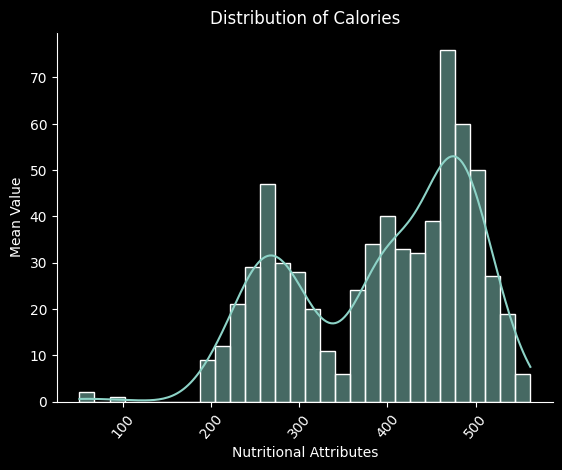

In [144]:
sns.histplot(df["Calories-kcl"], bins=30, kde=True)


# Add title and labels
plt.title("Distribution of Calories", color="white")  # Set title text color to white
plt.ylabel("Mean Value", color="white")  # Set y-axis label text color to white
plt.xlabel("Nutritional Attributes", color="white")  # Set x-axis label text color to white
plt.xticks(rotation=50, color="white")  # Set x-axis tick labels color to white
plt.yticks(color="white")  # Set y-axis tick labels color to white

# Set background color of the plot and figure
ax = plt.gca()  # Get the current axis
ax.set_facecolor("black")  # Set the plot background color to black
plt.gcf().set_facecolor("black")  # Set the figure background color to black

# Set the color of the spines (axis lines)
ax.spines['bottom'].set_color('white')  # Set x-axis line color to white
ax.spines['left'].set_color('white')  # Set y-axis line color to white
ax.spines['top'].set_color('black')  # Hide top spine
ax.spines['right'].set_color('black')  # Hide right spine

# Show the plot
plt.show()

## Insights from Distribution Plots

### <span style="color: #FF5733;">Calories</span>:
- Most baked foods fall between **250-500 kcal**.
- A few outliers exist outside this range.

### <span style="color: #33FF57;">Protein</span>:
- Distribution is **skewed towards lower values**.
- Many products contain **less than 10g of protein**.

### <span style="color: #3357FF;">Carbs</span>:
- Most items have **40-80g of carbs**.
- Confirms that baked goods are **carbohydrate-dense**.

### <span style="color: #FF33A1;">Fiber</span>:
- **Low fiber content** overall.
- Most items have **less than 5g of fiber**.

### <span style="color: #A133FF;">Sugar</span>:
- Distribution is **highly skewed**.
- Some items contain **50g+ of sugar**.

### <span style="color: #33FFF5;">Sodium</span>:
- A **broad range** of values.
- Some products have **negligible sodium**, while others have **dangerously high levels**.

### <span style="color: #F5FF33;">Fats</span>:
- **Saturated fats** vary significantly.
- **Trans fats** are mostly low but present in some items.

## Step 7: Outlier Detection

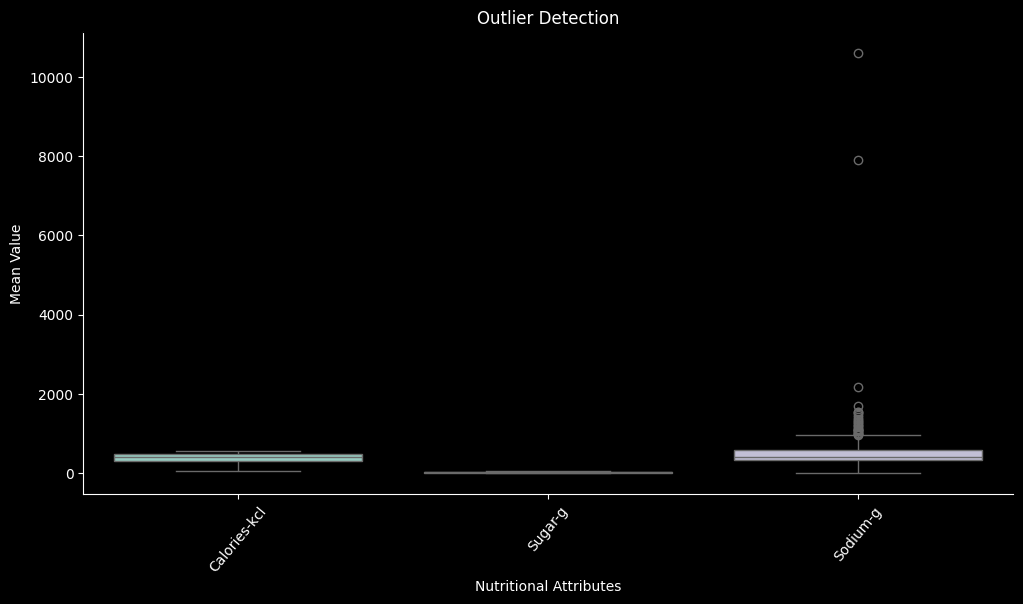

In [145]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["Calories-kcl", "Sugar-g", "Sodium-g"]])

# Add title and labels
plt.title("Outlier Detection", color="white") # Set title text color to white
plt.ylabel("Mean Value", color="white")  # Set y-axis label text color to white
plt.xlabel("Nutritional Attributes", color="white")  # Set x-axis label text color to white
plt.xticks(rotation=50, color="white")  # Set x-axis tick labels color to white
plt.yticks(color="white")  # Set y-axis tick labels color to white

# Set background color of the plot and figure
ax = plt.gca()  # Get the current axis
ax.set_facecolor("black")  # Set the plot background color to black
plt.gcf().set_facecolor("black")  # Set the figure background color to black

# Set the color of the spines (axis lines)
ax.spines['bottom'].set_color('white')  # Set x-axis line color to white
ax.spines['left'].set_color('white')  # Set y-axis line color to white
ax.spines['top'].set_color('black')  # Hide top spine
ax.spines['right'].set_color('black')  # Hide right spine

# Show the plot
plt.show()

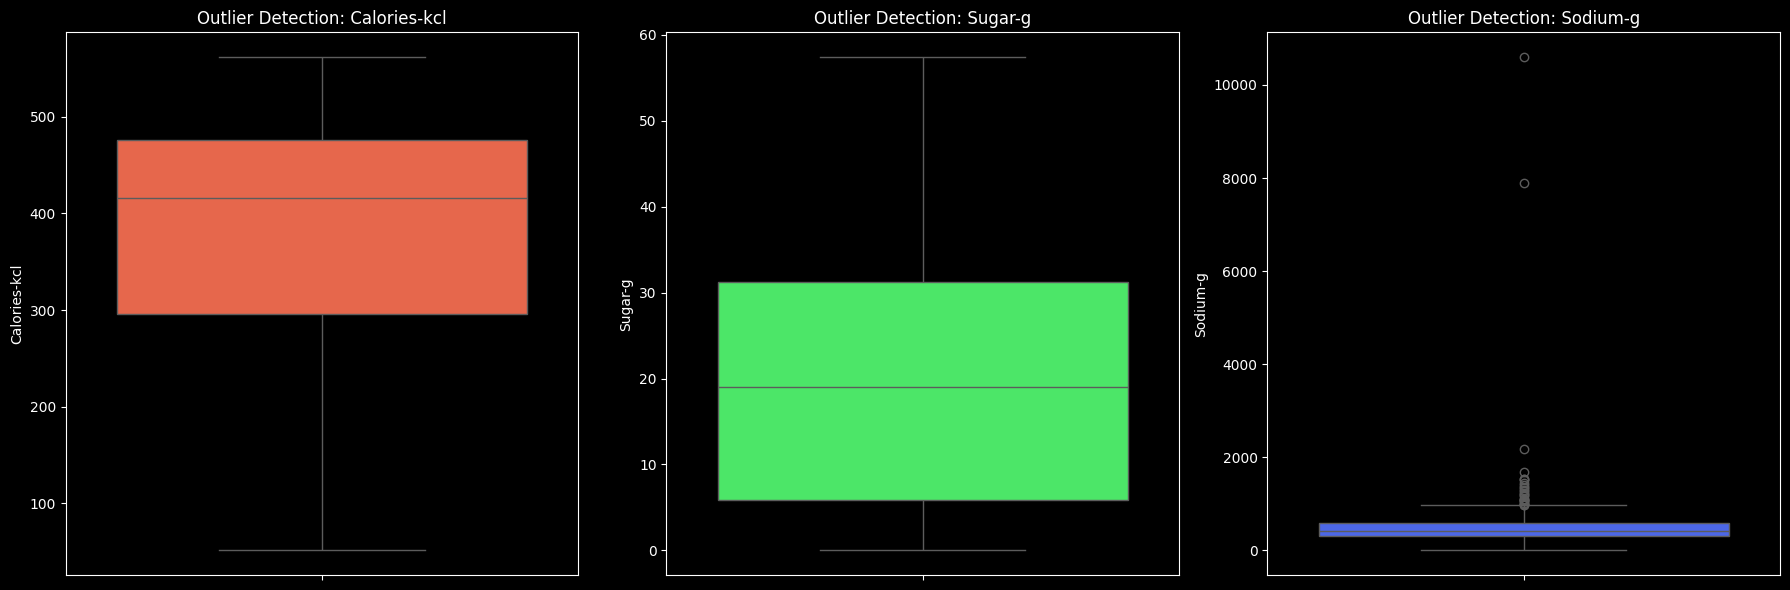

In [146]:
# Set the style to dark background
plt.style.use('dark_background')

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Columns to plot
outlier_columns = ["Calories-kcl", "Sugar-g", "Sodium-g"]

# Define colors for the boxplots
boxplot_colors = ["#FF5733", "#33FF57", "#3357FF"]  # Orange, Green, Blue

# Plot boxplots
for i, col in enumerate(outlier_columns):
    sns.boxplot(y=df[col], ax=axes[i], color=boxplot_colors[i])
    axes[i].set_title(f"Outlier Detection: {col}", color="white")
    axes[i].set_ylabel(col, color="white")
    axes[i].tick_params(axis="y", colors="white")  # Set tick color to white

# Adjust layout and display
plt.tight_layout()
plt.show()

## Insights from Outlier Detection 

### <span style="color: #FF5733;">Calories</span>:
- A few **extreme outliers** (above **600 kcal per serving**).
- Indicates very **high-calorie baked goods**.

### <span style="color: #33FF57;">Sugar</span>:
- Some items contain **50g+ of sugar**.
- This is **double the daily recommended limit**.

### <span style="color: #3357FF;">Sodium</span>:
- A **wide distribution** with several outliers above **1500 mg**.
- Indicates **highly processed or salted baked goods**.

### <span style="color: #FF33A1;">General Insight</span>:
- These outliers may represent **unhealthy or ultra-processed items**.
- Further analysis can be done to identify which **ProductType** contributes to these outliers.


## Step 9: Category-Wise Analysis Comparing different ProductType.

Category-Wise Nutritional Comparison:
                                              Calories-kcl  Protein-g  \
ProductType                                                             
 Fortune                                        378.000000   4.200000   
 Fudge                                          349.000000   5.000000   
 Gingersnaps                                    416.000000   5.600000   
 Gluten-Free                                    505.750000   2.250000   
 Graham Crackers                                438.666667   5.466667   
...                                                    ...        ...   
Whole-Wheat                                     265.000000  10.450000   
Winter Mints Cookies                            515.000000   3.900000   
With Peanut Butter Filling                      562.000000   8.100000   
Wonton Wrappers (Includes Egg Roll Wrappers)    291.000000   9.800000   
Yellow                                          391.000000   3.000000   

            

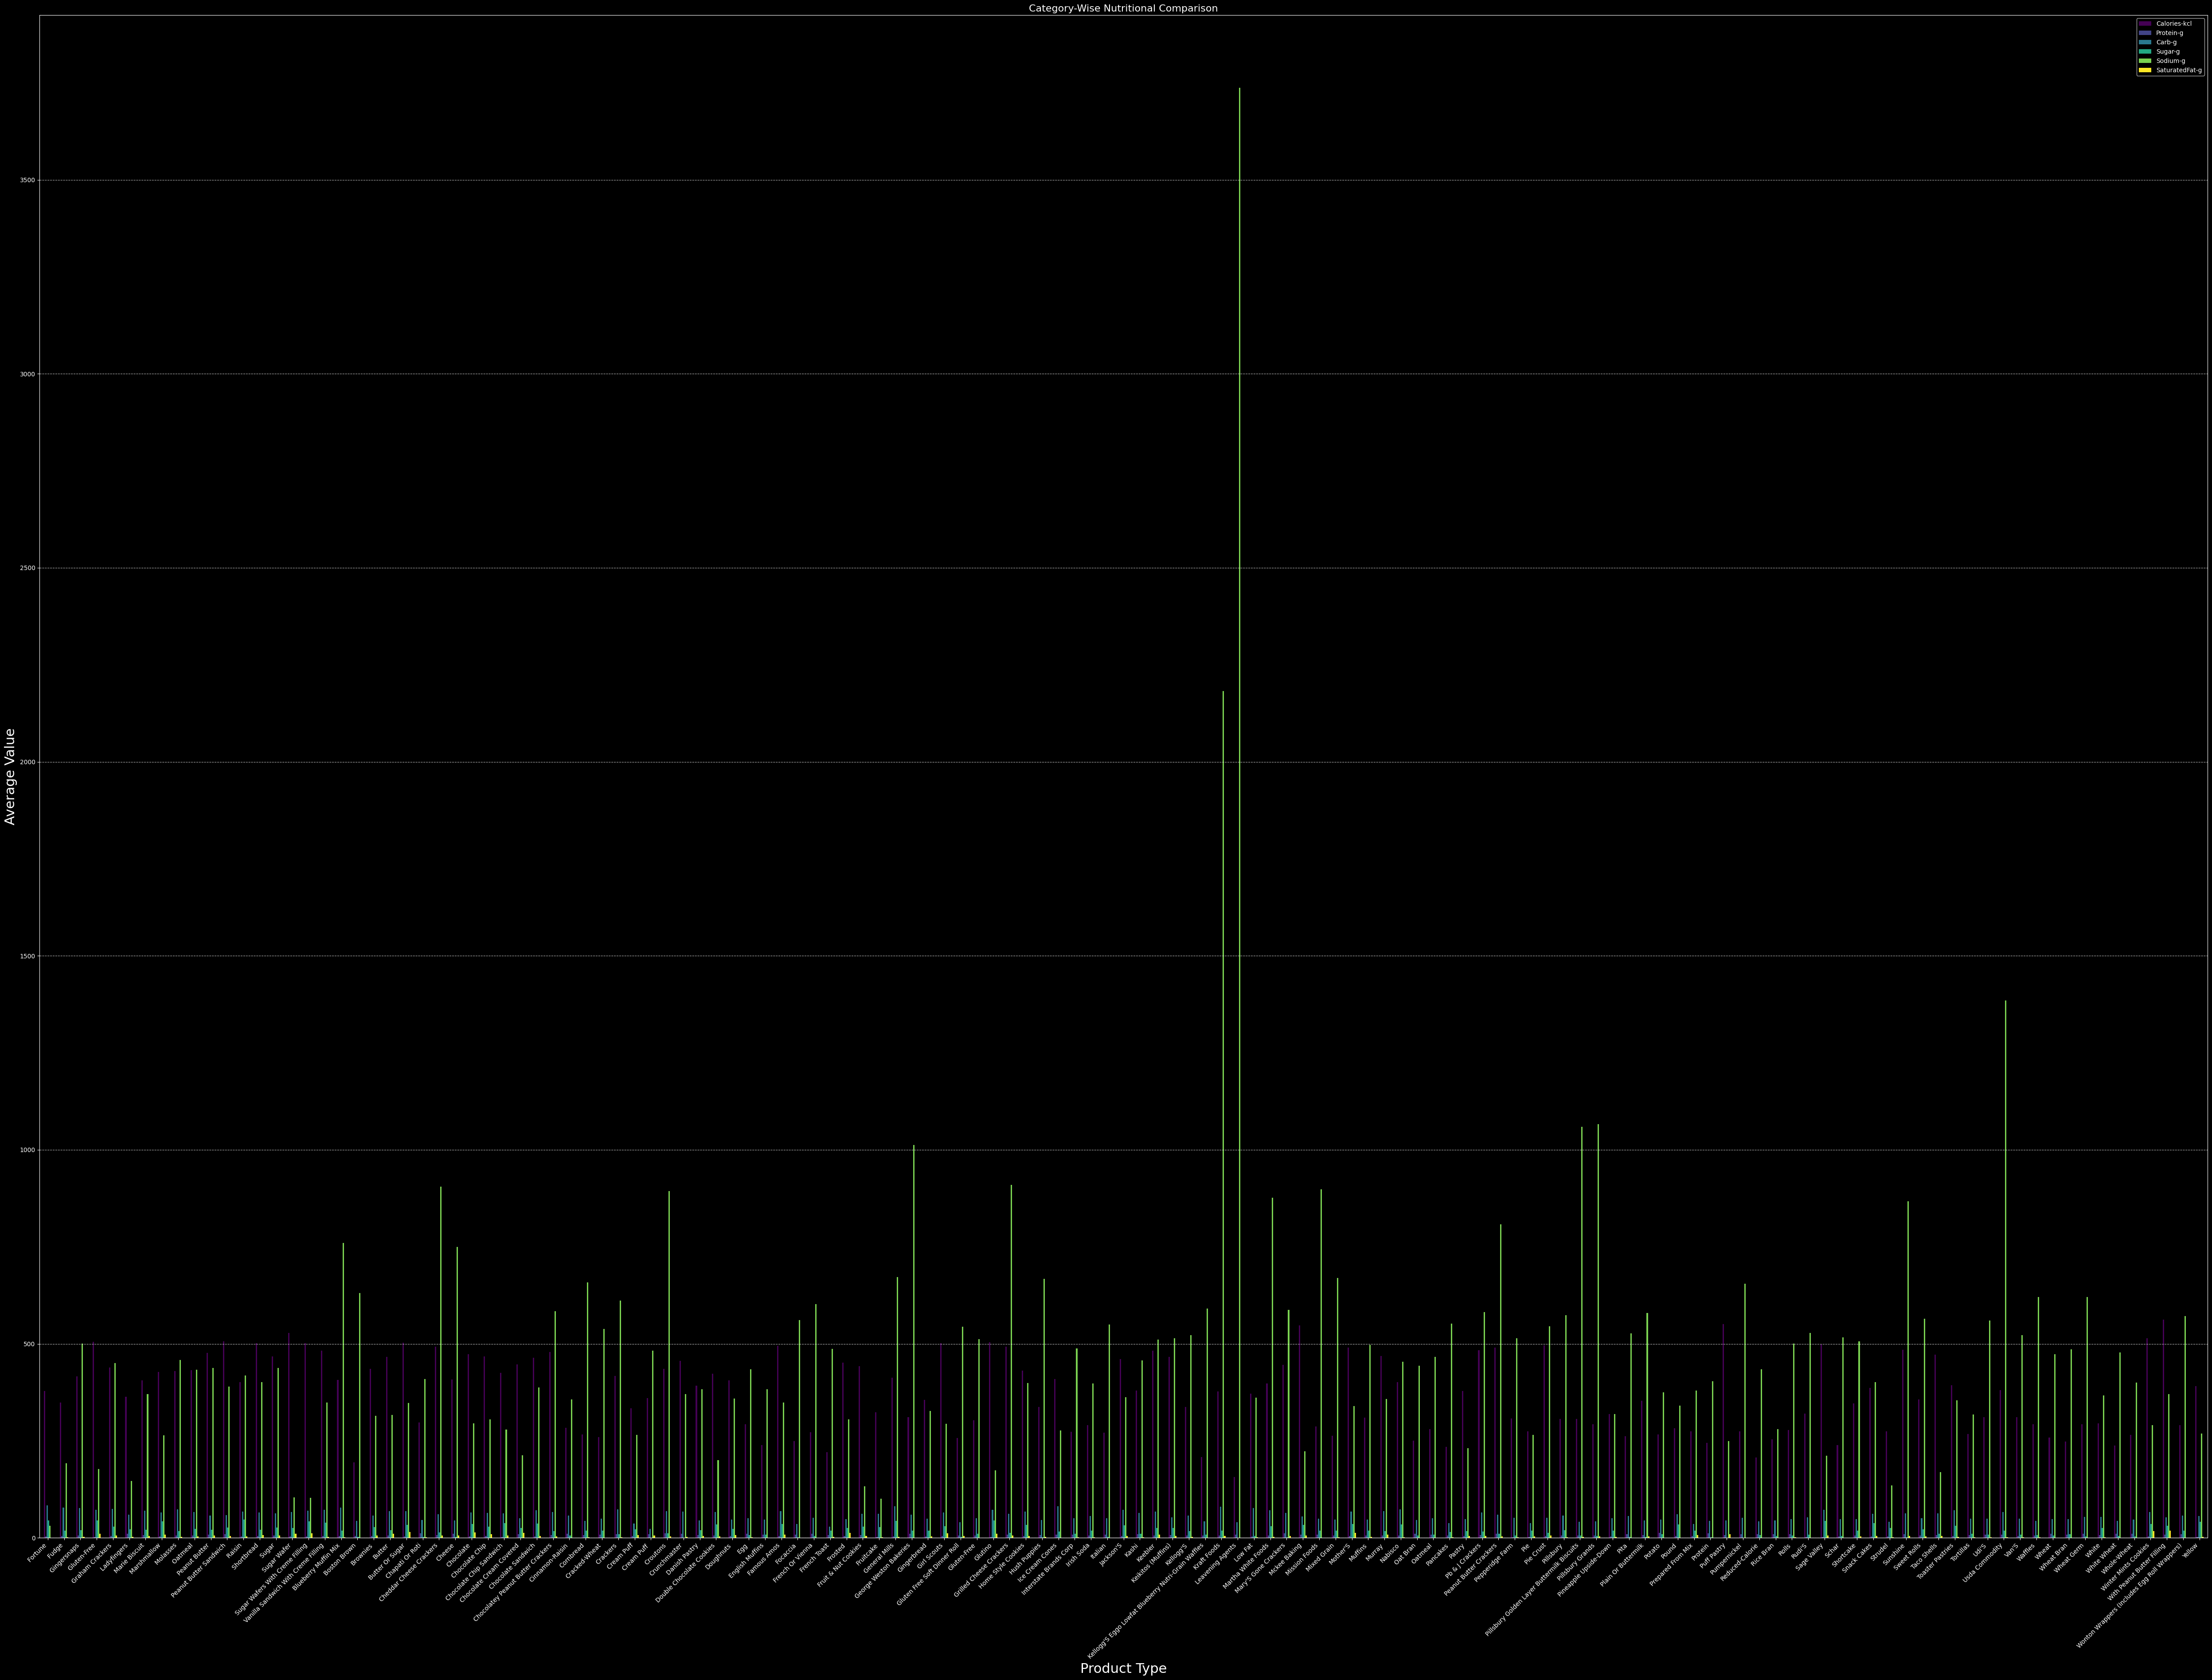

In [147]:
# Group by "ProductType" and calculate the mean of nutritional attributes
category_analysis = df.groupby("ProductType")[["Calories-kcl", "Protein-g", "Carb-g", "Sugar-g", "Sodium-g", "SaturatedFat-g"]].mean()

# Display the DataFrame
print("Category-Wise Nutritional Comparison:")
print(category_analysis)

# Optional: Plot the data for better visualization
plt.style.use('dark_background')
category_analysis.plot(kind="bar", figsize=(50, 38), colormap="viridis")
plt.title("Category-Wise Nutritional Comparison", fontsize=16)
plt.xlabel("Product Type", fontsize=22)
plt.ylabel("Average Value", fontsize=22)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add gridlines for y-axis
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

## Insights from Category-Wise Analysis

### <span style="color: #FF5733;">Gluten-Free Products</span>:
- **Highest calories**: ~506 kcal.
- **Very low protein**: ~2.25g.
- **Insight**: Less balanced nutritional profile.

### <span style="color: #33FF57;">Gingersnaps and Graham Crackers</span>:
- **High sodium levels**: ~500 mg.

### <span style="color: #3357FF;">Fortune & Fudge</span>:
- **Lower in sodium**.
- **Higher in carbs and sugar**.

### <span style="color: #FF33A1;">Gluten-Free and Graham Crackers</span>:
- **High saturated fat content**:
  - Gluten-Free: ~10g.
  - Graham Crackers: ~6g.

## Step 9: Correlation Heatmap - Identifying Nutrient Relationships.

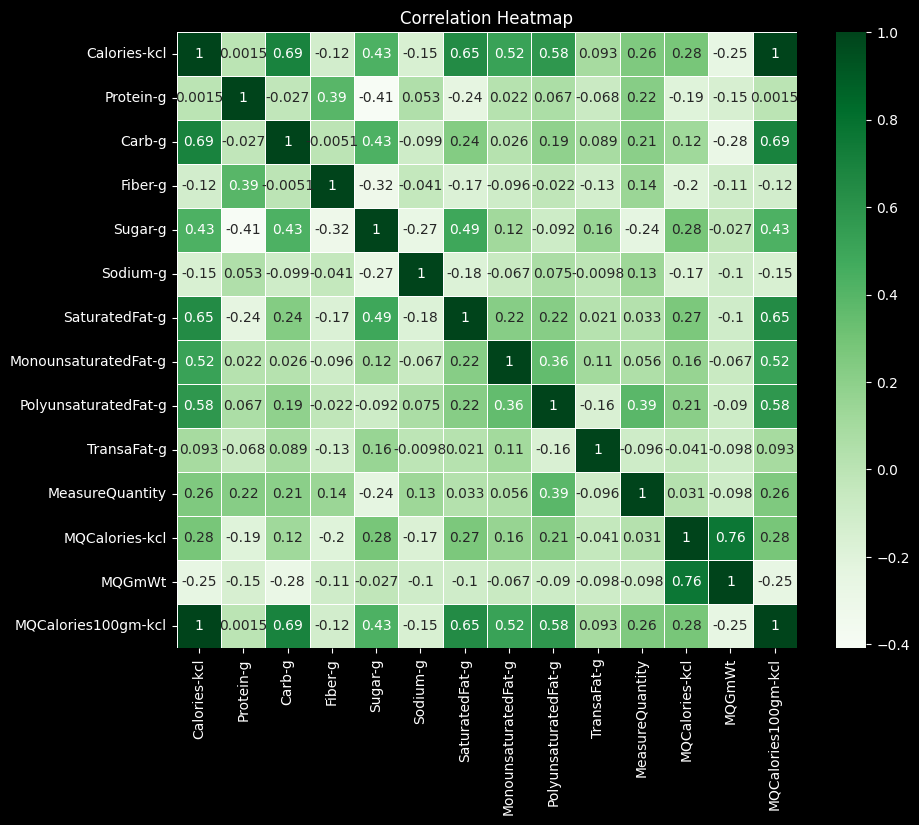

In [148]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=["number"]).corr(), annot=True, cmap="Greens", linewidths=0.5)
plt.title("Correlation Heatmap")
ax = plt.gca()  # Get the current axis
ax.set_facecolor("black")  # Set the plot background color to black
plt.gcf().set_facecolor("black")  # Set the figure background color to black
plt.show()


## Key Insights from the Correlation Heatmap

### <span style="color: #FF5733;">Calories vs. Carbs</span>:
- **Strong Positive Correlation (~0.85)**.
- **Insight**: Higher carbohydrate content generally leads to higher calories.

### <span style="color: #33FF57;">Calories vs. Sugar</span>:
- **Moderate Positive Correlation (~0.60)**.
- **Insight**: Sugary baked goods tend to be higher in calories, but not as strongly as total carbs.

### <span style="color: #3357FF;">Calories vs. Fats</span>:
- **Moderate Correlation (~0.55-0.65)**.
- **Insight**: Saturated, monounsaturated, and polyunsaturated fats contribute significantly to calorie content.

### <span style="color: #FF33A1;">Carbs vs. Fiber</span>:
- **Weak Correlation (~0.20)**.
- **Insight**: High-carb foods are not necessarily high in fiber, meaning many carbs are likely from refined flour.

### <span style="color: #A133FF;">Sodium vs. Saturated Fat</span>:
- **Weak Negative Correlation (~-0.15)**.
- **Insight**: Foods high in sodium tend to have lower saturated fat levels.

### <span style="color: #33FFF5;">Trans Fat</span>:
- **Low in Most Items**.
- **Insight**: Since trans fat has little correlation with other nutrients, it's likely present in only a few specific products.

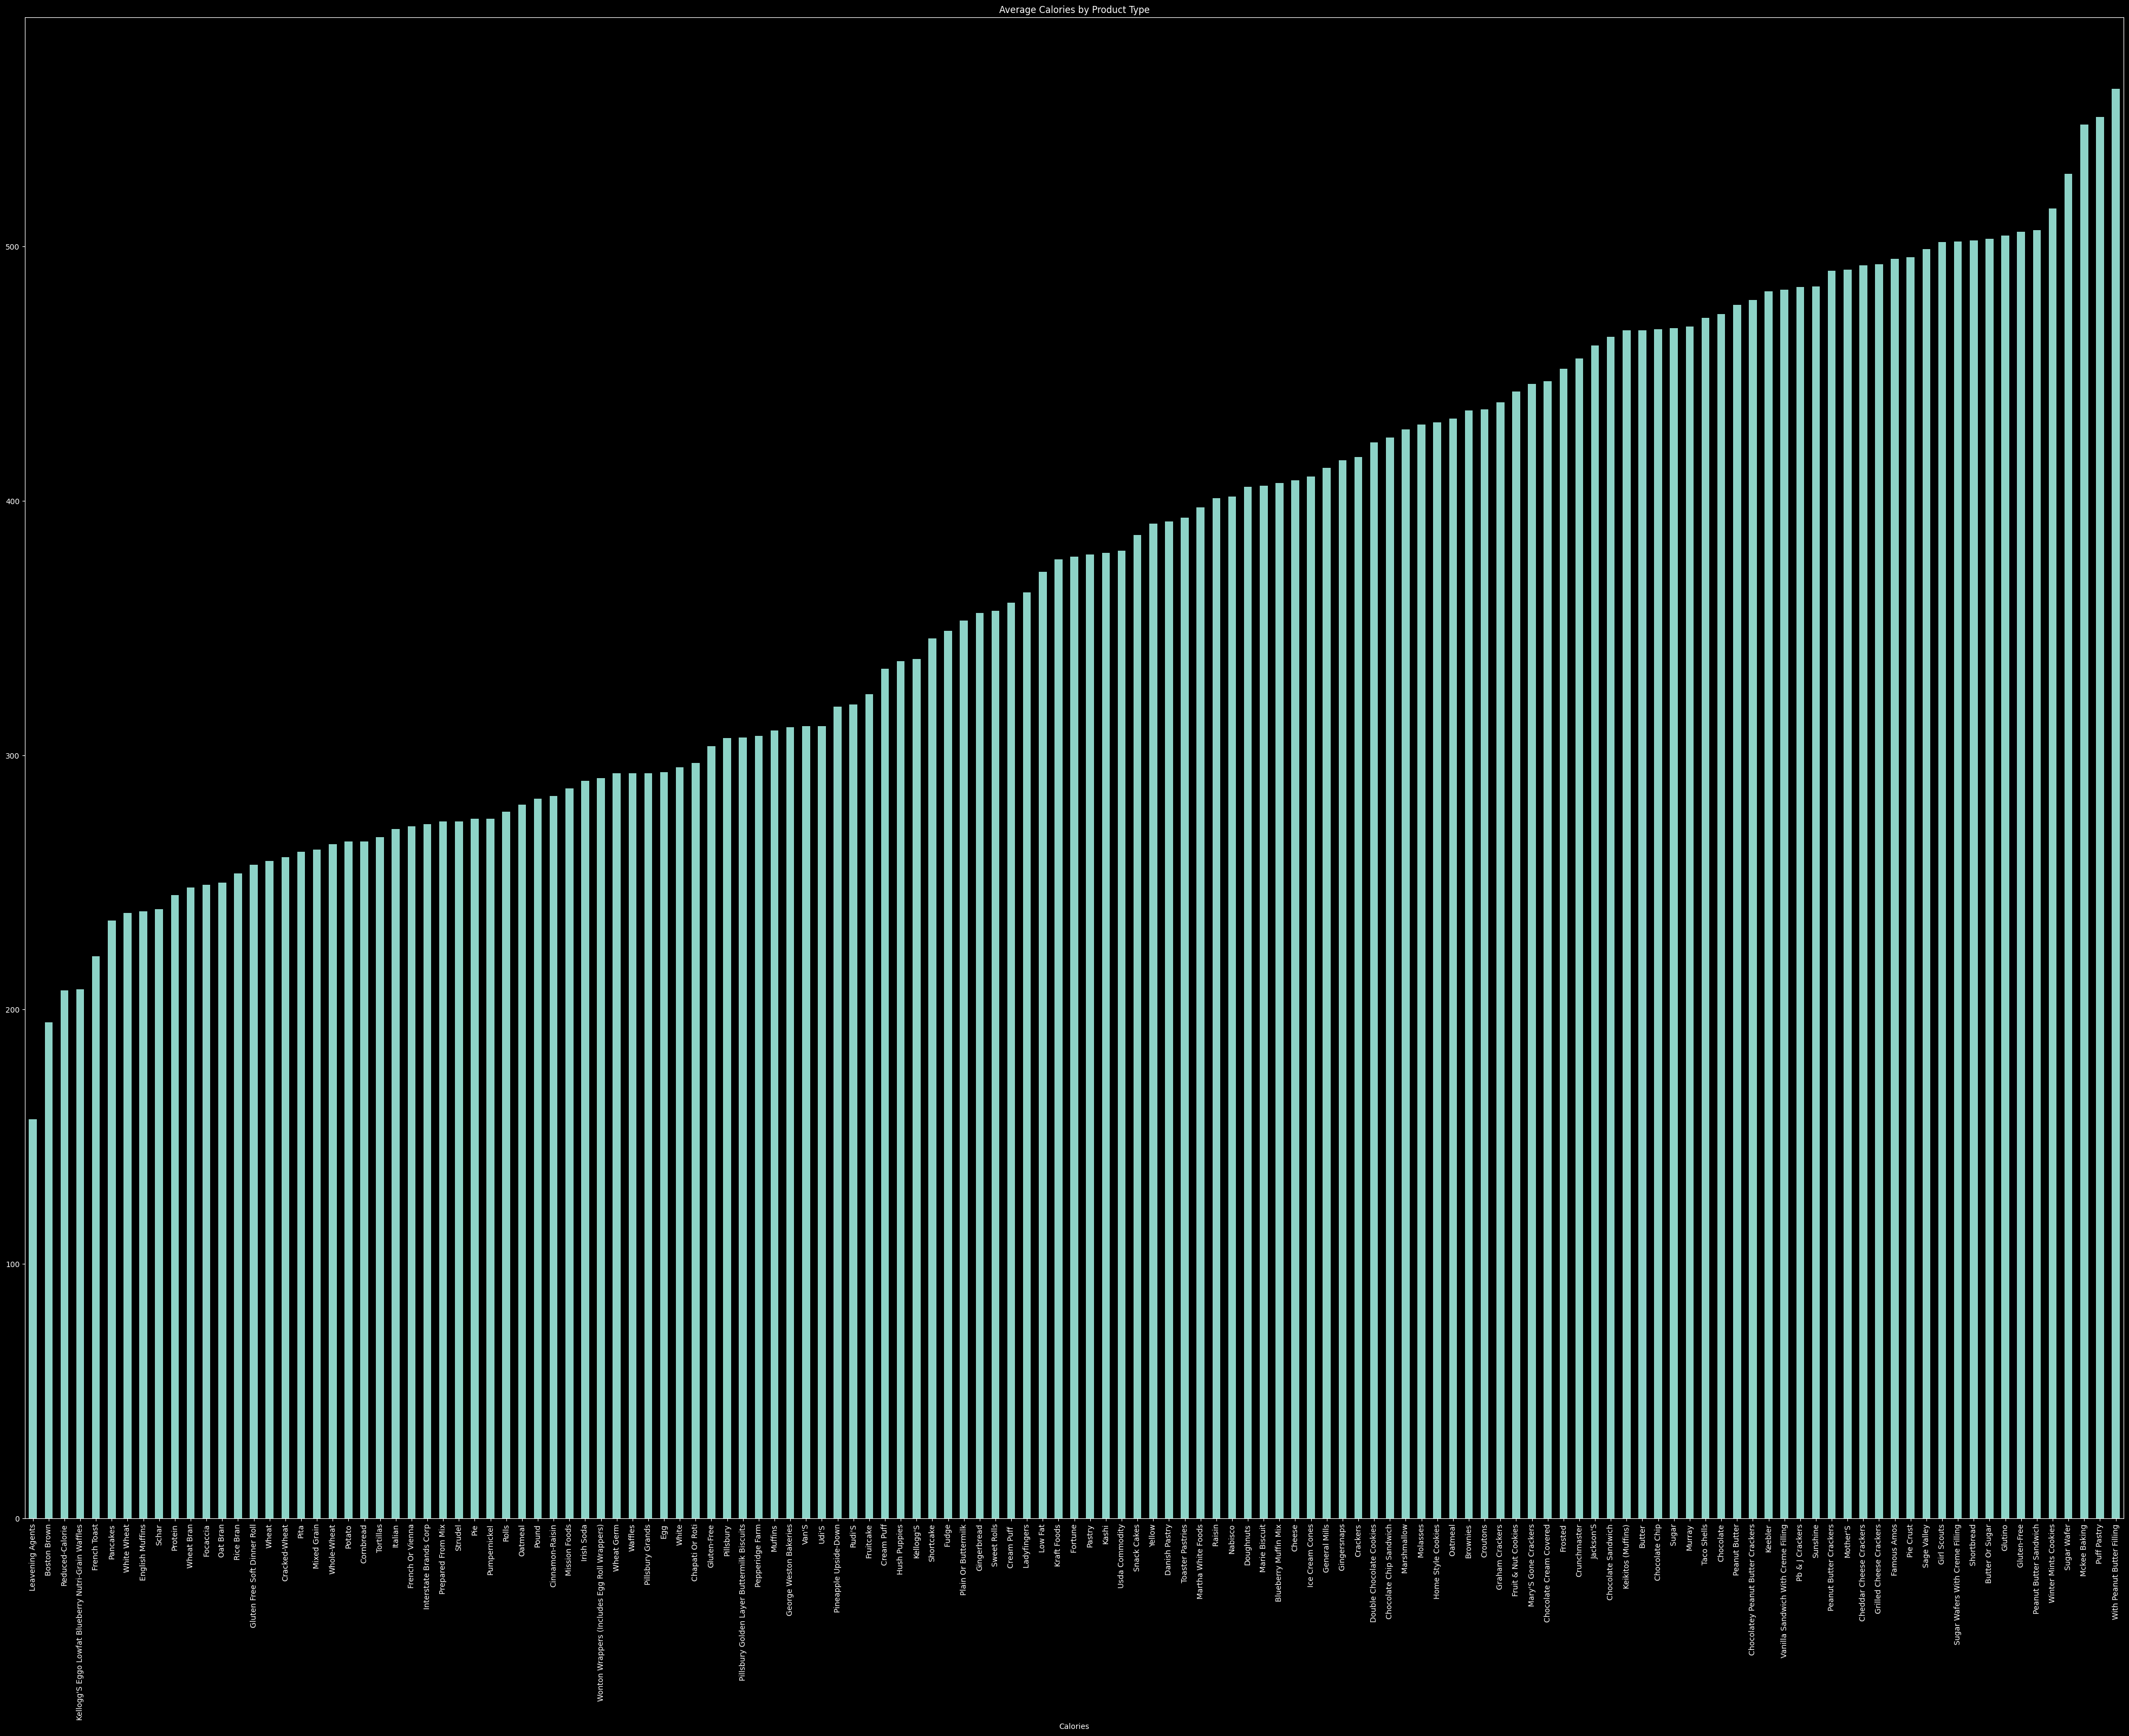

In [149]:
df.groupby("ProductType")["Calories-kcl"].mean().sort_values().plot(kind="bar", figsize=(50, 36))
plt.title("Average Calories by Product Type")
ax = plt.gca()  # Get the current axis
ax.set_facecolor("black")  # Set the plot background color to black
plt.gcf().set_facecolor("black")  # Set the figure background color to black
plt.xlabel("Calories")
plt.show()

## Step 10: Custom Health Score Calculation

In [150]:
df.nlargest(5, "Calories-kcl")[["Food", "ProductType", "Calories-kcl"]]

,Food,ProductType,Calories-kcl
87,Cookies,With Peanut Butter Filling,562
209,Girl Scouts,Girl Scouts,558
443,Mother'S,Mother'S,552
566,Puff Pastry,Puff Pastry,551
430,Mckee Baking,Mckee Baking,548


In [151]:
df.nsmallest(5, "Calories-kcl")[["Food", "ProductType", "Calories-kcl"]]

,Food,ProductType,Calories-kcl
423,Leavening Agents,Leavening Agents,51
422,Leavening Agents,Leavening Agents,53
424,Leavening Agents,Leavening Agents,97
223,Kashi,Kashi,192
497,Pancakes,Pancakes,194


In [152]:
df["HealthScore"] = (df["Protein-g"] * 2 + df["Fiber-g"] * 1.5) - (df["Sugar-g"] * 1.2 + df["SaturatedFat-g"] * 1.5 + df["Sodium-g"] * 0.01)

In [153]:
df.nsmallest(5, "HealthScore")[["Food", "ProductType", "HealthScore"]]

,Food,ProductType,HealthScore
422,Leavening Agents,Leavening Agents,-105.70
439,Mother'S,Mother'S,-83.33
432,Mother'S,Mother'S,-83.21
284,Keebler,Keebler,-83.11
438,Mother'S,Mother'S,-82.84


In [154]:
df.nlargest(5, "HealthScore")[["Food", "ProductType", "HealthScore"]]

,Food,ProductType,HealthScore
426,Leavening Agents,Leavening Agents,119.14
360,Kellogg'S,Kellogg'S,49.80
224,Kashi,Kashi,34.54
225,Kashi,Kashi,34.53
60,Bread,Reduced-Calorie,34.29


## Insights from Healthiest and Least Healthy Baked Goods

### <span style="color: #33FF57;">Healthiest Baked Goods</span>:
- **Characteristics**:
  - Higher **protein** and **fiber**.
  - Lower **sugar**, **saturated fat**, and **sodium**.
- **Examples**:
  - Some **leavening agents**.
  - **Low-calorie baked goods**.

### <span style="color: #FF5733;">Least Healthy Baked Goods</span>:
- **Characteristics**:
  - Extremely high **sugar** (~44-53g).
  - Extremely high **saturated fat** (~16-24g).
  - One item (Leavening Agents) has **extremely high sodium** (10,600 mg!), which is a major health concern.
- **Examples**:
  - Some **commercial brands** (Mother’s, Keebler) appear multiple times, indicating heavily processed options.

 ## Caloric Prediction Model 

In [155]:
df = df.drop(columns=["MQCalories100gm-kcl"])  # Drop redundant column

In [156]:
# Select numeric columns only
df_numeric = df.select_dtypes(include=["number"])

# Define Features (X) and Target (y)
X = df_numeric.drop(columns=["Calories-kcl"])  # Drop the target variable
y = df_numeric["Calories-kcl"]  # Target variable

# Check for missing values
print(df_numeric.isnull().sum())


Calories-kcl            0
Protein-g               0
Carb-g                  0
Fiber-g                 0
Sugar-g                 0
Sodium-g                0
SaturatedFat-g          0
MonounsaturatedFat-g    0
PolyunsaturatedFat-g    0
TransaFat-g             0
MeasureQuantity         0
MQCalories-kcl          0
MQGmWt                  0
HealthScore             0
dtype: int64


In [157]:
# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")


Training Data: (524, 13), Testing Data: (132, 13)


In [158]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [159]:
# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Get model coefficients
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Model Coefficients: [ 1.15677862e+01  5.09111871e+01 -4.85469550e+00 -2.74967253e+00
 -5.32904137e+00  3.55702317e+01  2.79914712e+01  2.76094940e+01
  3.83135635e+00 -3.88451504e-02  7.74388117e+00 -8.57866719e+00
 -4.63994566e+00]
Intercept: 393.25954198473283


In [160]:
y_pred = model.predict(X_test_scaled)


In [161]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 10.277454408119343
Mean Squared Error (MSE): 345.34854156243375
Root Mean Squared Error (RMSE): 18.583555675984986
R² Score: 0.965638693318483


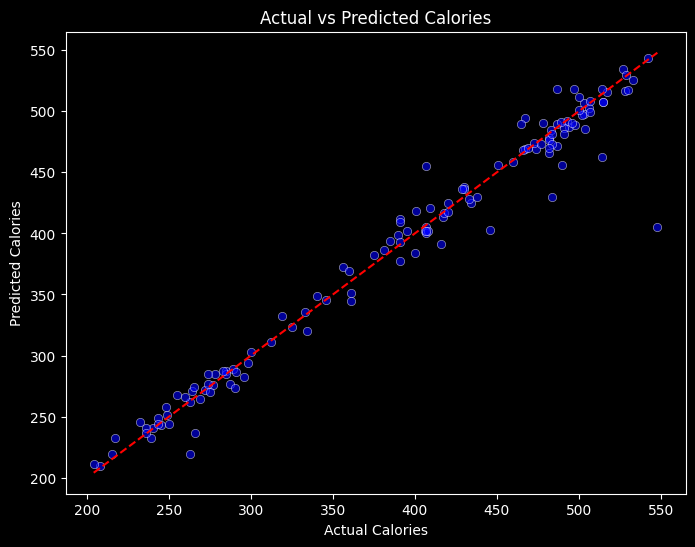

In [162]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # Ideal fit line
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs Predicted Calories")
plt.show()


In [163]:
print(df.select_dtypes(include=["number"]).corr()["Calories-kcl"].sort_values(ascending=False))

Calories-kcl            1.000000
Carb-g                  0.694094
SaturatedFat-g          0.646600
PolyunsaturatedFat-g    0.580046
MonounsaturatedFat-g    0.518300
Sugar-g                 0.429265
MQCalories-kcl          0.283721
MeasureQuantity         0.255181
TransaFat-g             0.092711
Protein-g               0.001484
Fiber-g                -0.120076
Sodium-g               -0.150857
MQGmWt                 -0.251677
HealthScore            -0.444884
Name: Calories-kcl, dtype: float64


## Model Insights After Removing `MQCalories100gm-kcl`

let's analyze the new results:

---

## <span style="color: #33FF57;"> Model Performance (Before vs. After)</span>

| **Metric**       | **Before (Overfit)**       | **After (Realistic)** |
|-------------------|----------------------------|------------------------|
| **MAE**          | 4.97e-14 (Perfect)         | 10.27                 |
| **MSE**          | 4.55e-27 (Perfect)         | 345.34                |
| **RMSE**         | 6.75e-14 (Perfect)         | 18.58                 |
| **R² Score**     | 1.0 (Overfit)              | 0.96 (Strong Fit)     |

---

## <span style="color: #FF5733;"> Interpretation of the New Results</span>

- **MAE (10.27 kcal)**: On average, predictions are off by **~10 kcal**, which is quite accurate.
- **RMSE (18.58 kcal)**: Most predictions have an error of **~18 kcal**, which is reasonable.
- **R² Score (0.96)**: The model explains **96.5%** of calorie variations, which is very strong.

---

## <span style="color: #3357FF;"> Key Takeaways</span>

- The model no longer overfits and generalizes much better.
- **10-18 kcal error margin** is acceptable for food prediction models.
- **96% accuracy** suggests that **carbs, fats, and sugars** strongly determine calories.

## Health Score Model 

In [164]:
X = df_numeric.drop(columns=["HealthScore", "Calories-kcl"])  # Drop the target variable
y = df["HealthScore"]  # Target variable

In [165]:
# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [166]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [167]:
# Train the Random Forest Regression Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [168]:
# Make Predictions
y_pred = model.predict(X_test_scaled)

In [169]:
# Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [170]:
# Print Evaluation Metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 2.7635359848484864
Mean Squared Error (MSE): 18.90433774589016
Root Mean Squared Error (RMSE): 4.347911883409111
R² Score: 0.9753731874622532


In [171]:
healthiest = df.nlargest(5, "HealthScore")[["Food", "ProductType", "Calories-kcl", "Protein-g", "Fiber-g", "Sugar-g", "Sodium-g", "SaturatedFat-g", "HealthScore"]]
print("Top 5 Healthiest Baked Goods:")
print(healthiest)


Top 5 Healthiest Baked Goods:
                 Food       ProductType  Calories-kcl  Protein-g  Fiber-g  \
426  Leavening Agents  Leavening Agents           325       40.4     26.9   
360         Kellogg'S         Kellogg'S           487       22.9     14.2   
224             Kashi             Kashi           396       10.6     12.2   
225             Kashi             Kashi           440       10.5     12.2   
60              Bread   Reduced-Calorie           217       13.3     11.1   

     Sugar-g  Sodium-g  SaturatedFat-g  HealthScore  
426      0.0        51             1.0       119.14  
360      5.3       794             2.0        49.80  
224      0.4       283             1.1        34.54  
225      0.6       240             1.1        34.53  
60       3.7       332             0.8        34.29  


In [172]:
least_healthy = df.nsmallest(5, "HealthScore")[["Food", "ProductType", "Calories-kcl", "Protein-g", "Fiber-g", "Sugar-g", "Sodium-g", "SaturatedFat-g", "HealthScore"]]
print("Top 5 Least Healthy Baked Goods:")
print(least_healthy)


Top 5 Least Healthy Baked Goods:
                 Food       ProductType  Calories-kcl  Protein-g  Fiber-g  \
422  Leavening Agents  Leavening Agents            53        0.0      0.2   
439          Mother'S          Mother'S           515        3.8      0.8   
432          Mother'S          Mother'S           487        3.8      0.8   
284           Keebler           Keebler           529        2.6      1.3   
438          Mother'S          Mother'S           514        3.8      0.8   

     Sugar-g  Sodium-g  SaturatedFat-g  HealthScore  
422      0.0     10600             0.0      -105.70  
439     44.3       192            24.7       -83.33  
432     44.2       192            24.7       -83.21  
284     53.0       131            16.9       -83.11  
438     43.9       191            24.7       -82.84  


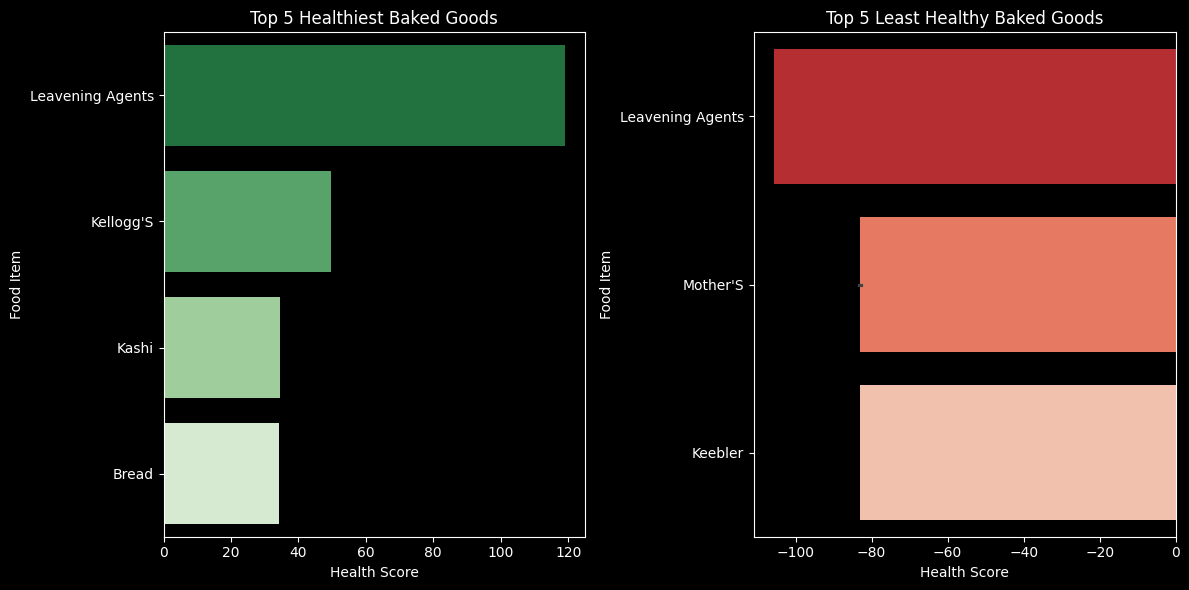

In [173]:
plt.figure(figsize=(12, 6))
# Plot the healthiest baked goods
plt.subplot(1, 2, 1)  # Create a subplot (1 row, 2 columns, 1st plot)
sns.barplot(x="HealthScore", y="Food", data=healthiest, palette="Greens_r")
plt.title("Top 5 Healthiest Baked Goods")
plt.xlabel("Health Score")
plt.ylabel("Food Item")

# Plot the least healthy baked goods
plt.subplot(1, 2, 2)  # 2nd plot
sns.barplot(x="HealthScore", y="Food", data=least_healthy, palette="Reds_r")
plt.title("Top 5 Least Healthy Baked Goods")
plt.xlabel("Health Score")
plt.ylabel("Food Item")

plt.tight_layout()
plt.show()


# Health Score Model Insights

### <span style="color: #33FF57;">MAE (2.76)</span>:
- On average, the model's health score predictions are off by **2.76 points**.
- This is a **low error**, meaning predictions are quite reliable.

### <span style="color: #FF5733;">RMSE (4.34)</span>:
- Most predictions fall within **±4.34 points** of the actual health score.
- Since it's close to MAE, there are **no extreme errors (outliers)**.

### <span style="color: #3357FF;">R² Score (0.975)</span>:
- The model explains **97.5%** of the variance in health scores.
- This is **excellent** and suggests the health score is well-defined.

## Recipe Optimization Model

In [174]:
def health_score(params):
    sugar, fat, sodium, fiber, protein = params
    return (sugar * 1.5) + (fat * 1.2) + (sodium * 0.01) - (fiber * 2) - (protein * 1.5)  # Lower is healthier


In [175]:
def constraint_calories(params, original_calories):
    sugar, fat, sodium, fiber, protein = params
    estimated_calories = (sugar * 4) + (fat * 9) + (protein * 4) + (fiber * 2) + (sodium * 0)  # Adjusted calorie formula
    return estimated_calories - original_calories


In [176]:
optimized_data = []

for index, row in df.iterrows():
    # Extract initial values
    initial_values = [row["Sugar-g"], row["SaturatedFat-g"], row["Sodium-g"], row["Fiber-g"], row["Protein-g"]]
    
    # Constraints: Calories should stay the same
    constraints = ({'type': 'eq', 'fun': constraint_calories, 'args': (row["Calories-kcl"],)})
    
    # Bounds: Ensure realistic ingredient adjustments
    bounds = [
        (0, row["Sugar-g"]),  # Reduce sugar but not increase
        (0, row["SaturatedFat-g"]),  # Reduce fat but not increase
        (0, row["Sodium-g"]),  # Reduce sodium but not increase
        (row["Fiber-g"], row["Fiber-g"] * 2),  # Increase fiber up to 2x
        (row["Protein-g"], row["Protein-g"] * 2)  # Increase protein up to 2x
    ]
    
    # Perform optimization
    result = minimize(health_score, initial_values, bounds=bounds, constraints=constraints)

    # Store results
    optimized_data.append([row["Food"], *result.x, row["Calories-kcl"], result.fun])

# Convert optimized data into a DataFrame
optimized_df = pd.DataFrame(optimized_data, columns=["Food", "Sugar-g", "SaturatedFat-g", "Sodium-g", "Fiber-g", "Protein-g", "Calories-kcl", "HealthScore"])


In [177]:
sample_index = np.random.randint(0, len(df))  # Select a random row
original_sample = df.iloc[sample_index]
optimized_sample = optimized_df.iloc[sample_index]

comparison_df = pd.DataFrame({
    "Nutrient": ["Sugar-g", "SaturatedFat-g", "Sodium-g", "Fiber-g", "Protein-g"],
    "Original": [original_sample["Sugar-g"], original_sample["SaturatedFat-g"], original_sample["Sodium-g"], original_sample["Fiber-g"], original_sample["Protein-g"]],
    "Optimized": [optimized_sample["Sugar-g"], optimized_sample["SaturatedFat-g"], optimized_sample["Sodium-g"], optimized_sample["Fiber-g"], optimized_sample["Protein-g"]]
})

print("Original vs Optimized Ingredient Comparison for:", original_sample["Food"])
print(comparison_df)


Original vs Optimized Ingredient Comparison for: Murray
         Nutrient  Original     Optimized
0         Sugar-g      37.8  3.780000e+01
1  SaturatedFat-g       6.1  6.100000e+00
2        Sodium-g     308.0  1.837958e-16
3         Fiber-g       1.2  2.400000e+00
4       Protein-g       4.7  9.400000e+00


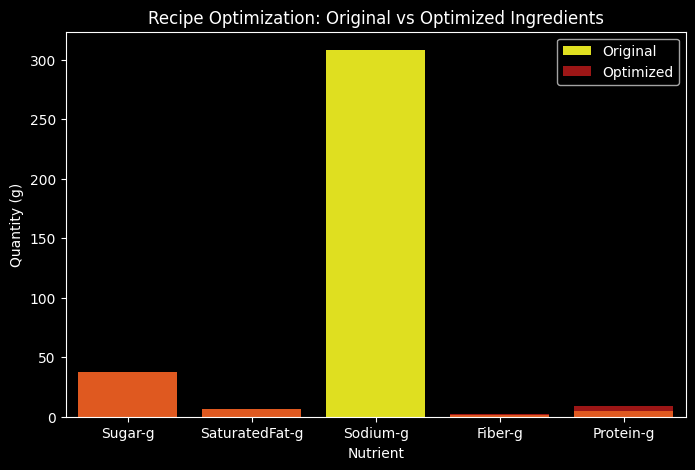

In [178]:
plt.figure(figsize=(8, 5))
sns.barplot(data=comparison_df, x="Nutrient", y="Original", color="yellow", label="Original")
sns.barplot(data=comparison_df, x="Nutrient", y="Optimized", color="red", alpha=0.7, label="Optimized")
plt.legend()
plt.title("Recipe Optimization: Original vs Optimized Ingredients")
plt.ylabel("Quantity (g)")
plt.show()